In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import explore
import wrangle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle.wrangle_data()

In [3]:
df.head()

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance,description,...,railway,roundabout,station,stop,traffic_calming,traffic_signal,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,0,0,0,0,0,0,1,1,1,1
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,0,0,0,0,0,0,0,0,0,0
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,...,0,0,0,0,0,0,0,0,0,0
9,A-10,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,At I-71/Exit 26 - Accident.,...,0,0,0,0,0,0,0,0,0,0
10,A-11,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,39.196150,-84.473350,0.307,At OH-4/Paddock Rd/Exit 9 - Accident.,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2207273 entries, 0 to 2845341
Data columns (total 43 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     2207273 non-null  object        
 1   severity               2207273 non-null  int64         
 2   start_time             2207273 non-null  datetime64[ns]
 3   end_time               2207273 non-null  datetime64[ns]
 4   start_lat              2207273 non-null  float64       
 5   start_lng              2207273 non-null  float64       
 6   end_lat                2207273 non-null  float64       
 7   end_lng                2207273 non-null  float64       
 8   distance               2207273 non-null  float64       
 9   description            2207273 non-null  object        
 10  street                 2207273 non-null  object        
 11  side                   2207273 non-null  object        
 12  city                   22072

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
severity,2207273.0,2.074859,0.383238,1.000000,2.000000,2.000000,2.000000,4.00000
start_lat,2207273.0,36.007299,5.472468,24.566027,32.961350,35.742367,40.068347,49.00058
start_lng,2207273.0,-96.620998,18.264586,-124.548074,-117.977604,-91.066492,-80.335175,-67.48413
end_lat,2207273.0,36.007446,5.472576,24.566013,32.960691,35.743016,40.068511,49.07500
end_lng,2207273.0,-96.620736,18.264335,-124.545748,-117.978254,-91.065553,-80.335591,-67.48413
distance,2207273.0,0.696786,1.505375,0.000000,0.046000,0.210000,0.782000,155.18600
temperature,2207273.0,61.837794,18.560787,-33.000000,50.000000,64.000000,76.000000,119.00000
wind_chill,2207273.0,60.716221,20.517143,-50.100000,50.000000,64.000000,76.000000,119.00000
humidity,2207273.0,64.685077,22.713100,1.000000,49.000000,67.000000,84.000000,100.00000
pressure,2207273.0,29.373684,1.092009,16.720000,29.210000,29.730000,29.970000,58.90000


In [6]:
df = wrangle.downsample_data(df)

In [7]:
train, validate, test = explore.split_data(df, 'severity')

In [8]:
train.shape, validate.shape, test.shape

((115011, 43), (38337, 43), (38337, 43))

In [9]:
cols = ['distance','precipitation','visibility']

In [10]:
X_train, y_train = train[cols], train.severity
X_validate, y_validate = validate[cols], validate.severity
X_test, y_test = test[cols], test.severity

In [11]:
def rand_forest(X_train, y_train, depth, samples):
    # Make the model
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=samples, random_state=217)
    # Fit the model (on train and only train)
    forest.fit(X_train, y_train)
    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)
    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f'Tree depth: {depth}, minimum sample size: {samples}')
    return pd.DataFrame(report)


In [12]:
rand_forest(X_train, y_train, 6, 6)

Tree depth: 6, minimum sample size: 6


,2,3,4,accuracy,macro avg,weighted avg
precision,0.521066,0.697960,0.414362,0.50476,0.544463,0.546091
recall,0.347872,0.483896,0.690658,0.50476,0.507475,0.504760
f1-score,0.417209,0.571542,0.517968,0.50476,0.502239,0.501850
support,39000.000000,38748.000000,37263.000000,0.50476,115011.000000,115011.000000


In [13]:
# Let's use a for loop to compare the accuracy off different depths
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                      2             3             4  accuracy      macro avg  \
precision      0.521621      0.708301      0.410405  0.501795       0.546776   
recall         0.339615      0.471689      0.702842  0.501795       0.504715   
f1-score       0.411387      0.566272      0.518214  0.501795       0.498624   
support    39000.000000  38748.000000  37263.000000  0.501795  115011.000000   

            weighted avg  
precision       0.548481  
recall          0.501795  
f1-score        0.498180  
support    115011.000000  

Tree with max depth of 3
                      2             3             4  accuracy      macro avg  \
precision      0.524020      0.707607      0.410655  0.502108       0.547427   
recall         0.334231      0.473418      0.707646  0.502108       0.505098   
f1-score       0.408141      0.567293      0.519714  0.502108       0.498383   
support    39000.000000  38748.000000  37263.000000  0.502108  115011.000000   

            

In [14]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
model = pd.DataFrame(metrics)
model["difference"] = model.train_accuracy - model.validate_accuracy
model

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.501795,0.496179,0.005617
1,3,0.502108,0.497300,0.004808
2,4,0.502422,0.498057,0.004365
3,5,0.503787,0.498161,0.005626
4,6,0.505030,0.498735,0.006295
5,7,0.506995,0.499596,0.007399
6,8,0.508934,0.499935,0.008999
7,9,0.511595,0.500561,0.011034
8,10,0.514716,0.500874,0.013842
9,11,0.519429,0.502465,0.016964


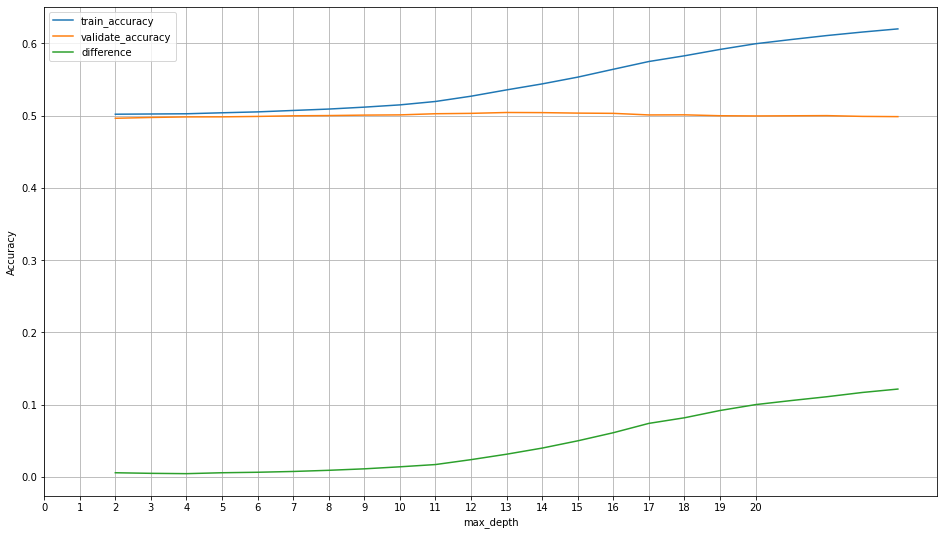

In [15]:
# Let's plot the different accuracies and differences
model.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()


In [16]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
model = pd.DataFrame(metrics)
model["difference"] = model.train_accuracy - model.validate_accuracy
model

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.568841,0.502074,0.066768
1,3,17,0.553738,0.502204,0.051534
2,4,16,0.543739,0.502804,0.040935
3,5,15,0.536349,0.503482,0.032866
4,6,14,0.529993,0.503743,0.026250
5,7,13,0.524637,0.503169,0.021468
6,8,12,0.519802,0.502987,0.016816
7,9,11,0.514020,0.501422,0.012599
8,10,10,0.511647,0.500561,0.011086
9,11,9,0.509230,0.500196,0.009034


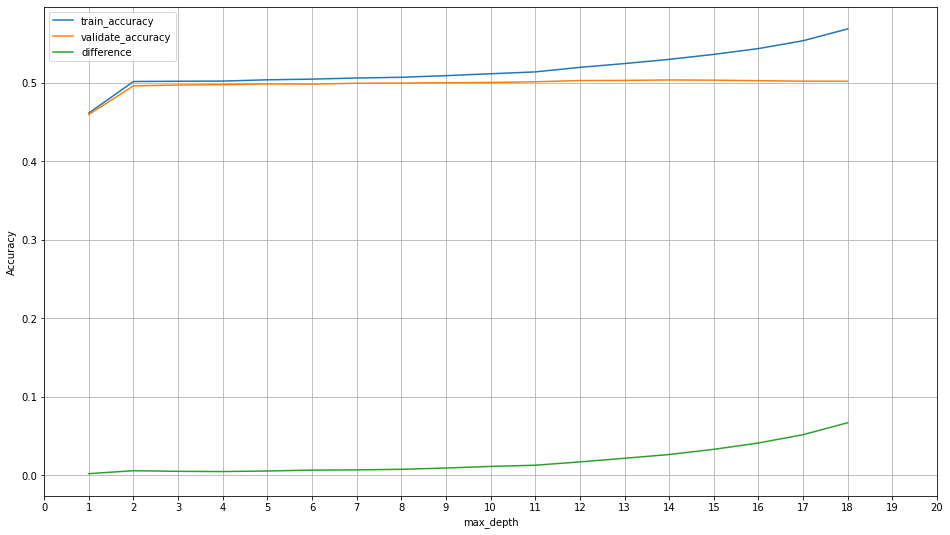

In [17]:
model.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [18]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
model = pd.DataFrame(metrics)
model["difference"] = model.train_accuracy - model.validate_accuracy
model

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.501795,0.496179,0.005617
1,3,3,0.502082,0.497274,0.004808
2,4,4,0.502161,0.497170,0.004991
3,5,5,0.503839,0.498031,0.005808
4,6,6,0.504760,0.498500,0.006260
5,7,7,0.506230,0.499674,0.006556
6,8,8,0.508291,0.499726,0.008564
7,9,9,0.509456,0.500535,0.008921
8,10,10,0.511647,0.500561,0.011086
9,11,11,0.514003,0.501239,0.012764


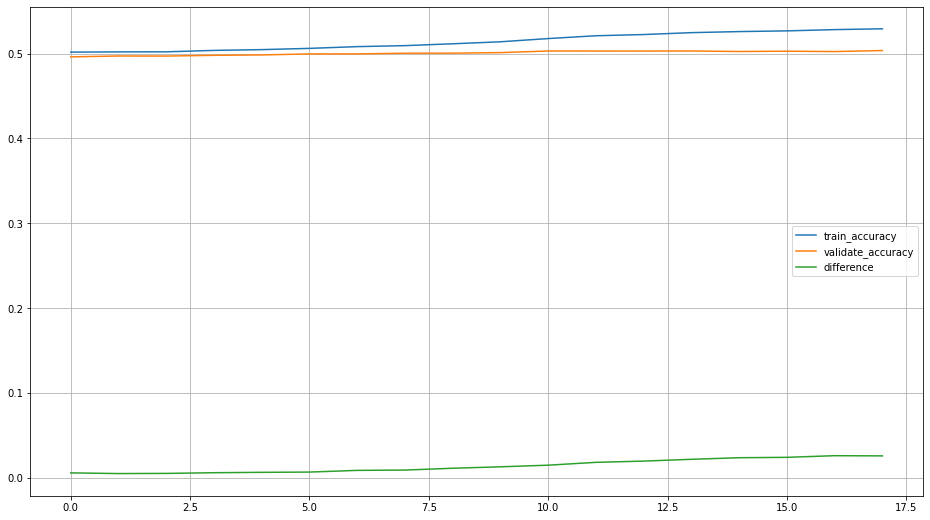

In [19]:
model[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.grid()

In [20]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
model = pd.DataFrame(metrics)
model["difference"] = model.train_accuracy - model.validate_accuracy
model

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,6,0.505013,0.498500,0.006512
1,3,6,0.504673,0.498917,0.005756
2,4,6,0.504656,0.498552,0.006104
3,5,6,0.505021,0.498813,0.006208
4,6,6,0.504760,0.498500,0.006260
5,7,6,0.505239,0.498631,0.006608
6,8,6,0.505091,0.498839,0.006252
7,9,6,0.504943,0.498709,0.006234
8,10,6,0.504673,0.498631,0.006043
9,11,6,0.504760,0.498631,0.006130


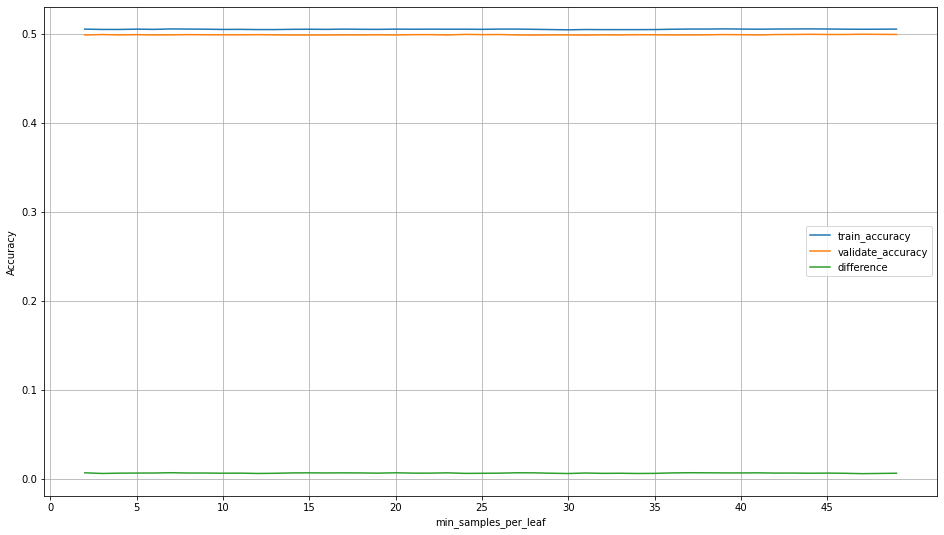

In [21]:
model.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid()


In [22]:
# loop it!
models = []
model_scores = []
for i in range(2,8):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    models.append(model)
    model_scores.append(model.score(X_train, y_train))

In [23]:
model_scores

[0.49990870438479795,
 0.500778186434341,
 0.500778186434341,
 0.501039031049204,
 0.503621392736347,
 0.5054733895018737]

In [24]:
models_acc = []

for x in range(1,21):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

    #predict it
    y_pred = knn.predict(X_train)
    
    #score it
    acc = knn.score(X_train, y_train)
    
    models_acc.append([x, acc])

In [25]:
pd.DataFrame(models_acc, columns =['neighbors','accuracy'])

,neighbors,accuracy
0,1,0.488823
1,2,0.455661
2,3,0.551452
3,4,0.546139
4,5,0.543044
5,6,0.538983
6,7,0.538548
7,8,0.538575
8,9,0.447496
9,10,0.536383


In [26]:
models_acc = []

for x in range(1,31):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

#     predict it
#     y_pred = knn.predict(X_train)
#     y_pred_val = knn.predict(X_validate)
    
    #score it
    acc = knn.score(X_train, y_train)
    acc_val = knn.score(X_validate, y_validate)
    
    models_acc.append([x, acc, acc_val])

In [27]:
df_models = pd.DataFrame(models_acc, columns=['neighbors', 'train_accuracy',
                                  'validate_accuracy'])
df_models

,neighbors,train_accuracy,validate_accuracy
0,1,0.488823,0.366591
1,2,0.455661,0.365156
2,3,0.551452,0.468999
3,4,0.546139,0.468164
4,5,0.543044,0.468868
5,6,0.538983,0.470877
6,7,0.538548,0.474789
7,8,0.538575,0.477085
8,9,0.447496,0.390354
9,10,0.536383,0.479719


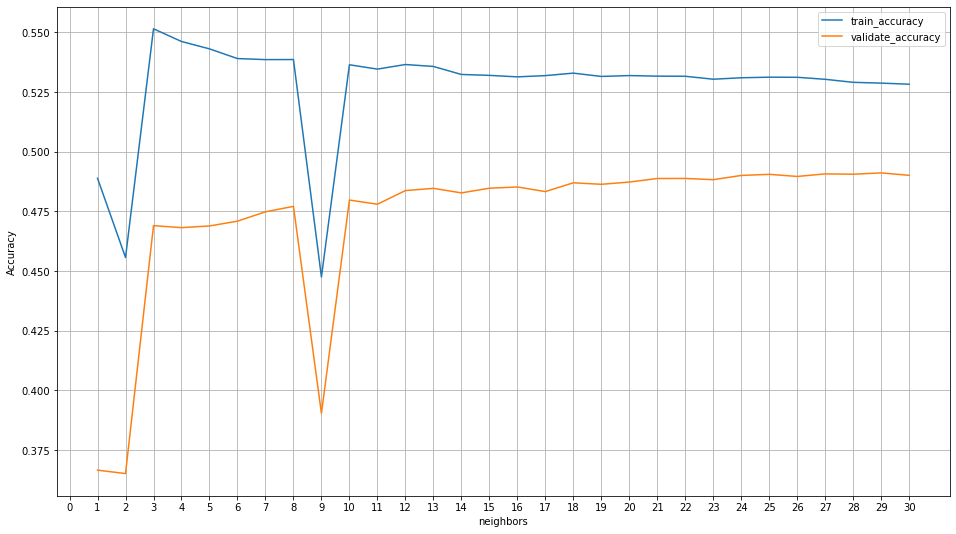

In [28]:
df_models.set_index('neighbors').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,1))
plt.grid()

In [29]:
# Create the logistic regression
logit = LogisticRegression(random_state=217)

# Fit a model using only these specified features
logit.fit(X_train, y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train)

In [30]:
baseline_accuracy = round((train.severity == 2).mean(), 2)
baseline_accuracy

0.34

In [31]:
print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Baseline is 0.34
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.39


In [32]:
# use the class_weights to hold the actual ratios`
logit2 = LogisticRegression(random_state=217, class_weight='balanced')
logit2.fit(X_train, y_train)
y_pred = logit2.predict(X_train)
accuracy = logit2.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.4


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115011 entries, 2442787 to 2094025
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     115011 non-null  object        
 1   severity               115011 non-null  int64         
 2   start_time             115011 non-null  datetime64[ns]
 3   end_time               115011 non-null  datetime64[ns]
 4   start_lat              115011 non-null  float64       
 5   start_lng              115011 non-null  float64       
 6   end_lat                115011 non-null  float64       
 7   end_lng                115011 non-null  float64       
 8   distance               115011 non-null  float64       
 9   description            115011 non-null  object        
 10  street                 115011 non-null  object        
 11  side                   115011 non-null  object        
 12  city                   115011 non-nul

In [34]:
cols = ['distance','precipitation','visibility','humidity','temperature','pressure','wind_speed','amenity','bump', 
       'crossing','give_way','junction','no_exit','railway','roundabout','station','stop','traffic_calming',
       'traffic_signal','sunrise_sunset']

In [35]:
X_train, y_train = train[cols], train.severity
X_validate, y_validate = validate[cols], validate.severity
X_test, y_test = test[cols], test.severity

In [36]:
# Let's use a for loop to compare the accuracy off different depths
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                      2             3             4  accuracy      macro avg  \
precision      0.434899      0.665386      0.474801  0.506317       0.525028   
recall         0.692103      0.549732      0.266726  0.506317       0.502853   
f1-score       0.534151      0.602055      0.341570  0.506317       0.492592   
support    39000.000000  38748.000000  37263.000000  0.506317  115011.000000   

            weighted avg  
precision       0.525480  
recall          0.506317  
f1-score        0.494633  
support    115011.000000  

Tree with max depth of 3
                      2             3             4  accuracy      macro avg  \
precision      0.449261      0.654495      0.487535  0.517507       0.530430   
recall         0.652385      0.568029      0.323806  0.517507       0.514740   
f1-score       0.532097      0.608204      0.389150  0.517507       0.509817   
support    39000.000000  38748.000000  37263.000000  0.517507  115011.000000   

            

In [37]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
model = pd.DataFrame(metrics)
model["difference"] = model.train_accuracy - model.validate_accuracy
model

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.506317,0.501578,0.004739
1,3,0.517507,0.514646,0.002861
2,4,0.529349,0.528523,0.000826
3,5,0.538844,0.537105,0.001739
4,6,0.541600,0.538957,0.002643
5,7,0.548200,0.544696,0.003504
6,8,0.554538,0.547069,0.007469
7,9,0.562033,0.552651,0.009382
8,10,0.569928,0.555130,0.014799
9,11,0.583657,0.560868,0.022789


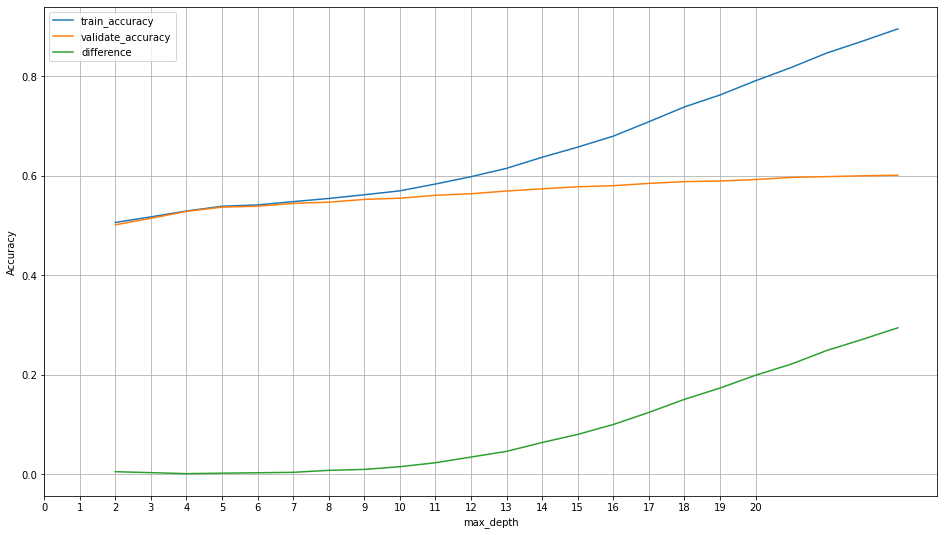

In [38]:
# Let's plot the different accuracies and differences
model.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()


In [39]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
model = pd.DataFrame(metrics)
model["difference"] = model.train_accuracy - model.validate_accuracy
model

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.695177,0.583066,0.112111
1,3,17,0.658181,0.579649,0.078532
2,4,16,0.633696,0.574589,0.059107
3,5,15,0.616376,0.570624,0.045752
4,6,14,0.604307,0.570545,0.033762
5,7,13,0.592048,0.565537,0.026511
6,8,12,0.581336,0.561233,0.020102
7,9,11,0.571476,0.556173,0.015303
8,10,10,0.566276,0.554712,0.011564
9,11,9,0.558147,0.550852,0.007295


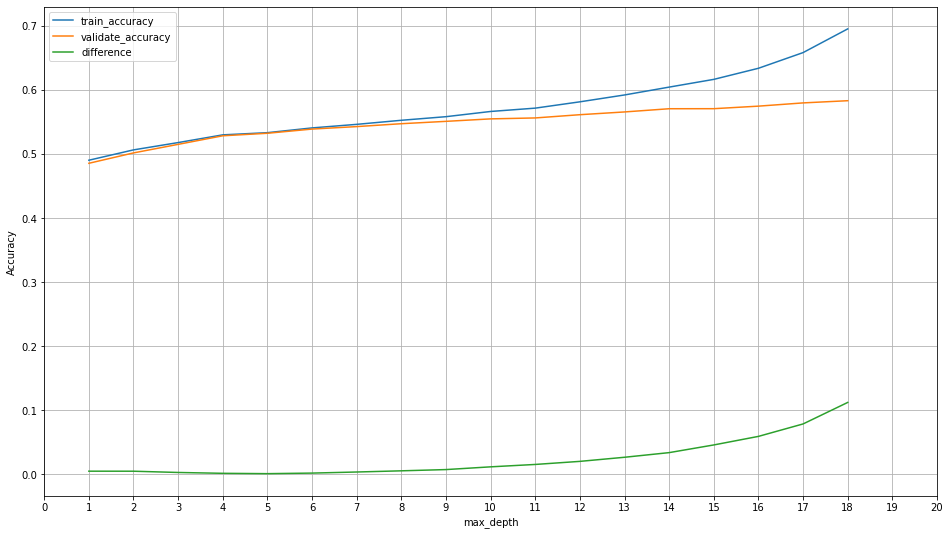

In [40]:
model.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [41]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
model = pd.DataFrame(metrics)
model["difference"] = model.train_accuracy - model.validate_accuracy
model

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.506317,0.501578,0.004739
1,3,3,0.517507,0.514646,0.002861
2,4,4,0.530419,0.529123,0.001296
3,5,5,0.535644,0.535488,0.000157
4,6,6,0.541974,0.539635,0.002339
5,7,7,0.546139,0.543861,0.002278
6,8,8,0.552443,0.547043,0.005399
7,9,9,0.558494,0.550826,0.007669
8,10,10,0.566276,0.554712,0.011564
9,11,11,0.570858,0.557790,0.013068


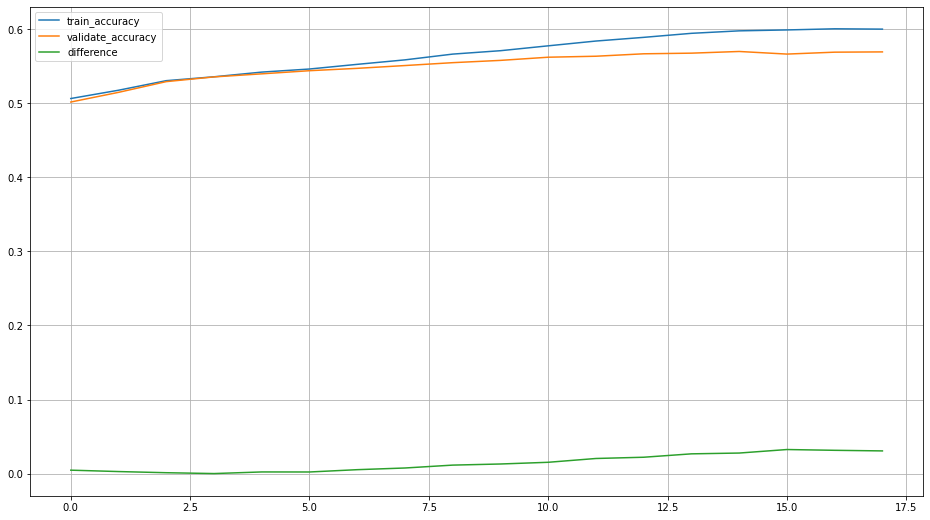

In [42]:
model[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.grid()

In [43]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
model = pd.DataFrame(metrics)
model["difference"] = model.train_accuracy - model.validate_accuracy
model

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,6,0.542870,0.539740,0.003130
1,3,6,0.542079,0.538409,0.003669
2,4,6,0.541253,0.538409,0.002843
3,5,6,0.540748,0.537888,0.002861
4,6,6,0.541974,0.539635,0.002339
5,7,6,0.541218,0.539792,0.001426
6,8,6,0.540948,0.539583,0.001365
7,9,6,0.540574,0.539557,0.001017
8,10,6,0.542366,0.541070,0.001296
9,11,6,0.542044,0.540418,0.001626


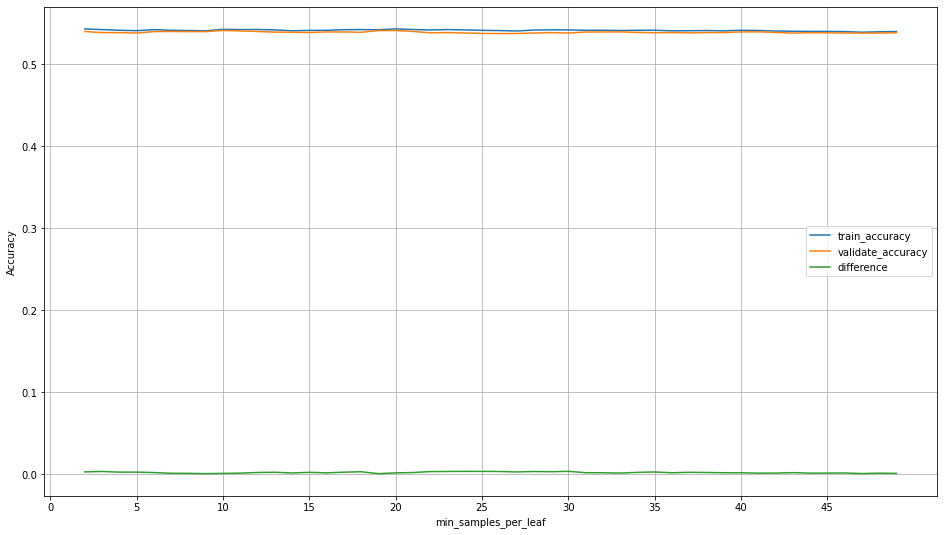

In [44]:
model.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid()


In [45]:
# loop it!
models = []
model_scores = []
for i in range(2,8):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    models.append(model)
    model_scores.append(model.score(X_train, y_train))

In [46]:
model_scores

[0.49990870438479795,
 0.5041430819660728,
 0.5103511837998105,
 0.5146551199450488,
 0.5200806879341976,
 0.5349662206223752]

In [47]:
models_acc = []

for x in range(1,21):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

    #predict it
    y_pred = knn.predict(X_train)
    
    #score it
    acc = knn.score(X_train, y_train)
    acc2 = knn.score(X_validate, y_validate)
    models_acc.append([x, acc, acc2])

In [48]:
df_models = pd.DataFrame(models_acc, columns=['neighbors', 'train_accuracy', 'validate_accuracy'])
df_models

,neighbors,train_accuracy,validate_accuracy
0,1,0.997235,0.488171
1,2,0.750633,0.453244
2,3,0.711071,0.459165
3,4,0.666232,0.453009
4,5,0.635226,0.452644
5,6,0.616254,0.453478
6,7,0.603499,0.454730
7,8,0.587266,0.451209
8,9,0.578510,0.452435
9,10,0.570441,0.452487


In [49]:
def knn_model(X_train, y_train, X_validate, y_validate, n):
    
    #make it
    knn = KNeighborsClassifier(n_neighbors=n)
    #fit it
    knn = knn.fit(X_train, y_train)
    #predict it
    y_pred = knn.predict(X_train)
    #score it
    print('Accuracy of KNN on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
    print('Accuracy of KNN on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

In [50]:
knn_model(X_train, y_train, X_validate, y_validate, 50)

Accuracy of KNN on training set: 0.49
Accuracy of KNN on validate set: 0.45


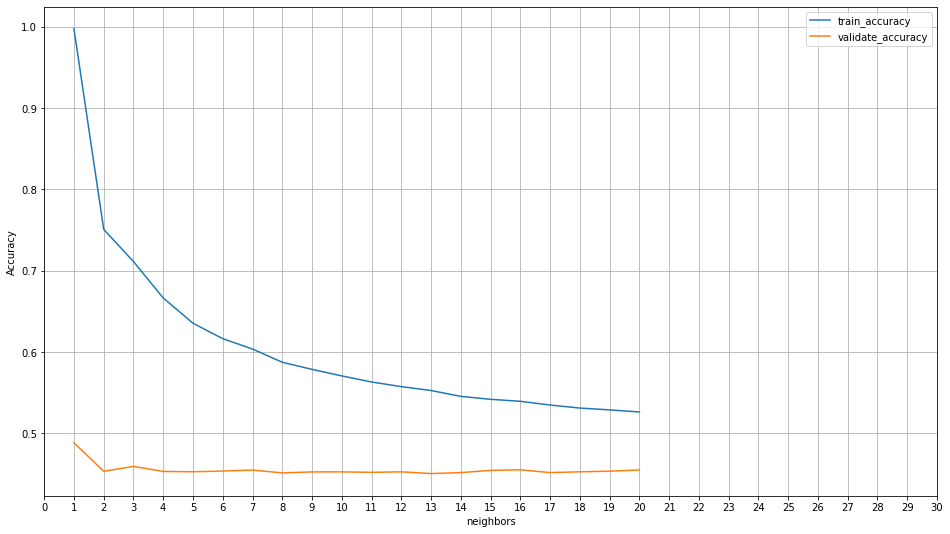

In [51]:
df_models.set_index('neighbors').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,1))
plt.grid()

In [52]:
# Create the logistic regression
logit = LogisticRegression(random_state=217)

# Fit a model using only these specified features
logit.fit(X_train, y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train)

In [53]:
print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Baseline is 0.34
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.45


In [54]:
# use the class_weights to hold the actual ratios`
logit2 = LogisticRegression(random_state=217, class_weight='balanced')
logit2.fit(X_train, y_train)
y_pred = logit2.predict(X_train)
accuracy = logit2.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.45


In [55]:
def log_model(X_train, y_train, X_validate, y_validate):
    # Create the logistic regression
    logit = LogisticRegression(random_state=217)
    # Fit a model using only these specified features
    logit.fit(X_train, y_train)
    # Since we .fit on a subset, we .predict on that same subset of features
    y_pred = logit.predict(X_train)
    print("Logistic Regression using selected features")
    print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit.score(X_train, y_train)))
    print(classification_report(y_train, y_pred))
    print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'.format(logit.score(X_validate, y_validate)))
    

In [56]:
log_model(X_train, y_train, X_validate, y_validate)

Logistic Regression using selected features
Accuracy of Logistic Regression classifier on training set: 0.45
              precision    recall  f1-score   support

           2       0.43      0.40      0.41     39000
           3       0.46      0.61      0.53     38748
           4       0.46      0.34      0.39     37263

    accuracy                           0.45    115011
   macro avg       0.45      0.45      0.44    115011
weighted avg       0.45      0.45      0.44    115011

Accuracy of Logistic Regression classifier on validate set: 0.45


### Modeling Again with new features / feature engineering

In [57]:
df['year'] = df.start_time.dt.year
df['month'] = df.start_time.dt.month
df['day'] = df.start_time.dt.day

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191685 entries, 1250474 to 2845328
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     191685 non-null  object        
 1   severity               191685 non-null  int64         
 2   start_time             191685 non-null  datetime64[ns]
 3   end_time               191685 non-null  datetime64[ns]
 4   start_lat              191685 non-null  float64       
 5   start_lng              191685 non-null  float64       
 6   end_lat                191685 non-null  float64       
 7   end_lng                191685 non-null  float64       
 8   distance               191685 non-null  float64       
 9   description            191685 non-null  object        
 10  street                 191685 non-null  object        
 11  side                   191685 non-null  object        
 12  city                   191685 non-nul

In [59]:
train, validate, test = explore.split_data(df, 'severity')

In [60]:
train.shape, validate.shape, test.shape

((115011, 46), (38337, 46), (38337, 46))

In [61]:
cols = ['distance','precipitation','visibility','humidity','temperature','pressure','wind_speed','junction','stop',
       'traffic_signal','sunrise_sunset','year','month','day']

In [62]:
X_train, y_train = train[cols], train.severity
X_validate, y_validate = validate[cols], validate.severity
X_test, y_test = test[cols], test.severity

In [63]:
# loop it!
models = []
model_scores = []
for i in range(2,8):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    models.append(model)
    model_scores.append(model.score(X_train, y_train))

In [64]:
model_scores

[0.5925694064046048,
 0.6179843667127493,
 0.6407474067697873,
 0.66310179026354,
 0.6675100642547235,
 0.673674691985984]

In [65]:
def tree_model(X_train, y_train, X_validate, y_validate, depth):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=217)
    clf = clf.fit(X_train, y_train)
    plt.figure(figsize=(13, 7))
    plot_tree(clf)
    plt.show()
    
    y_pred = clf.predict(X_train)
    y_pred_proba = clf.predict_proba(X_train)
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    print(classification_report(y_train, y_pred))
    print('Accuracy of Decision Tree classifier on validate set: {:.2f}'.format(clf.score(X_validate, y_validate)))

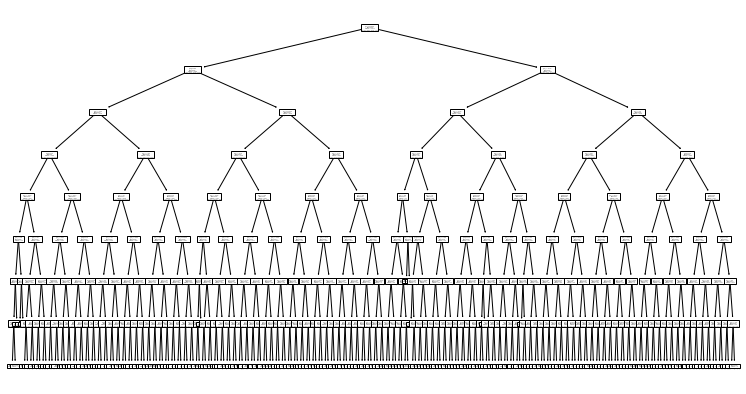

Accuracy of Decision Tree classifier on training set: 0.68
              precision    recall  f1-score   support

           2       0.72      0.80      0.76     39000
           3       0.68      0.86      0.76     38748
           4       0.60      0.37      0.46     37263

    accuracy                           0.68    115011
   macro avg       0.67      0.68      0.66    115011
weighted avg       0.67      0.68      0.66    115011

Accuracy of Decision Tree classifier on validate set: 0.67


In [66]:
tree_model(X_train, y_train, X_validate, y_validate, 8)

In [67]:
log_model(X_train, y_train, X_validate, y_validate)

Logistic Regression using selected features
Accuracy of Logistic Regression classifier on training set: 0.49
              precision    recall  f1-score   support

           2       0.50      0.59      0.54     39000
           3       0.49      0.70      0.58     38748
           4       0.46      0.18      0.26     37263

    accuracy                           0.49    115011
   macro avg       0.49      0.49      0.46    115011
weighted avg       0.49      0.49      0.46    115011

Accuracy of Logistic Regression classifier on validate set: 0.49


In [68]:
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.transform(X_validate)

In [69]:
X_train_scaled

array([[0.00164544, 0.        , 0.1       , ..., 0.6       , 0.90909091,
        0.03333333],
       [0.00253043, 0.        , 0.1       , ..., 1.        , 0.90909091,
        0.93333333],
       [0.        , 0.        , 0.1       , ..., 0.6       , 0.72727273,
        0.33333333],
       ...,
       [0.        , 0.        , 0.1       , ..., 0.8       , 0.45454545,
        0.8       ],
       [0.02098425, 0.        , 0.02      , ..., 0.6       , 0.81818182,
        1.        ],
       [0.        , 0.001001  , 0.06      , ..., 0.8       , 0.27272727,
        0.96666667]])

In [70]:
knn_model(X_train_scaled, y_train, X_validate_scaled, y_validate, 5)

Accuracy of KNN on training set: 0.75
Accuracy of KNN on validate set: 0.63


In [71]:
def rand_forest(X_train, y_train, depth, samples):
    '''This function takes in four arguments: training dataframe of features, training dataframe for the target, the depth
        of the tree as an integer, and the minimum number of samples per leaf as an integer. The function fits and trains
        a random forest model and makes predictions for testing. The function returns a classification report of the model's
        performance on the training set as well as the depth and sample leaf size.'''
    # Make the model
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=samples, random_state=217)
    # Fit the model on train only
    forest.fit(X_train, y_train)
    # Use the model
    # We'll evaluate the model's performance on train, first
    y_pred = forest.predict(X_train)
    # print the values selected for the depth and leaf samples
    print(f'Tree depth: {depth}, minimum sample size: {samples}')
    # return the performance report as a dataframe
    print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(forest.score(X_train, y_train)))
    # Produce the classification report on the actual y values and this model's predicted y values
    print(classification_report(y_train, y_pred))
    print('Accuracy of Random Forest classifier on validate set: {:.2f}'.format(forest.score(X_validate, y_validate)))


In [72]:
rand_forest(X_train, y_train, 20, 30)

Tree depth: 20, minimum sample size: 30
Accuracy of Random Forest classifier on training set: 0.73
              precision    recall  f1-score   support

           2       0.72      0.87      0.79     39000
           3       0.74      0.88      0.80     38748
           4       0.73      0.43      0.54     37263

    accuracy                           0.73    115011
   macro avg       0.73      0.73      0.71    115011
weighted avg       0.73      0.73      0.71    115011

Accuracy of Random Forest classifier on validate set: 0.70


In [73]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 40

for i in range(10, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
model = pd.DataFrame(metrics)
model["difference"] = model.train_accuracy - model.validate_accuracy
model

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,10,10,0.697107,0.682422,0.014686
1,11,11,0.706219,0.686126,0.020094
2,12,12,0.714245,0.688891,0.025354
3,13,13,0.722635,0.691812,0.030823
4,14,14,0.729200,0.694603,0.034597
5,15,15,0.734730,0.696064,0.038666
6,16,16,0.737677,0.696951,0.040727
7,17,17,0.742625,0.699637,0.042987
8,18,18,0.745581,0.700420,0.045161
9,19,19,0.744677,0.699794,0.044883


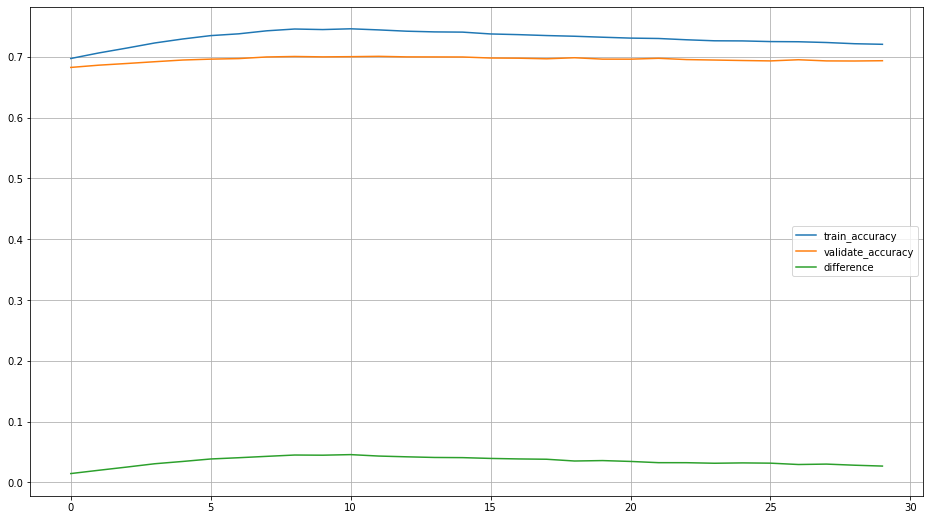

In [74]:
model[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.grid()

In [75]:
models_acc = []

for x in range(1,21):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

    #predict it
    y_pred = knn.predict(X_train)
    
    #score it
    acc = knn.score(X_train, y_train)
    
    models_acc.append([x, acc])

In [76]:
pd.DataFrame(models_acc, columns =['neighbors','accuracy'])

,neighbors,accuracy
0,1,0.997148
1,2,0.800280
2,3,0.765335
3,4,0.723313
4,5,0.701237
5,6,0.683082
6,7,0.673196
7,8,0.660450
8,9,0.652825
9,10,0.645321
